### Μαντζαρόπουλος Κώστας

---
---

# Ε1

Αρχικά ας εισάγουμε τις βιβλιοθήκες που θα χρειαστούμε καθώς και τα δεδομένα μας.

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats.stats as stats

plt.style.use('ggplot');

In [141]:
country_scores = pd.read_excel("patel-sandefur-human-capital-final-results.xlsx", sheet_name='Country Scores')

In [142]:
country_scores.head()

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542
2,Armenia,ARM,71.505402,NaN,454.000000,NaN
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000


Στο `WDI_data` αρχείο παρατηρήσαμε κάποιες τιμές με τελείες εκεί που θα έπρεπε να υπάρχει ΝaN value, εξού και η τιμη της παραμέτρου στο `na_values` όταν εισάγουμε το αρχείο.

In [143]:
wdi = pd.read_excel('WDI_data.xlsx', na_values='..')
wdi.head()

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.016488
1,Afghanistan,AFG,"School enrollment, primary (% net)",SE.PRM.NENR,NaN
2,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.225357
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.292517
4,Albania,ALB,"School enrollment, primary (% net)",SE.PRM.NENR,95.199600


- Από όλο το dataframe μας ενδιαφέρει η στήλη `2015[YR2015]` και η πρώτη γραμμή για κάθε χώρα που αναφέρεται στο GDPPP κάθε χώρας ξεχωριστα.

- Επίσης διαλέγουμε ως δείκτη ολόκληρου του dataframe τη στήλη `Country Code`. Αυτό διότι παρατηρήσαμε πως ορισμένα ονόματα των χωρών διαφέρουν μεταξύ των δυο datasets ενώ οι κωδικοί των χωρών είναι καθολικοί.

- Τέλος μετονοματίζουμε την στήλη με το GDP και την μετατρέπουμε σε `float`.

In [144]:
wdi_GDP = wdi[wdi['Series Code']=='NY.GDP.PCAP.PP.KD']
wdi_GDP.set_index('Country Code', inplace=True)

In [145]:
wdi_GDP = wdi_GDP.drop(columns=['Series Name','Series Code'])
wdi_GDP.head()

,Country Name,2015 [YR2015]
Country Code,,
AFG,Afghanistan,1809.016488
ALB,Albania,10971.292517
DZA,Algeria,13724.723853
ASM,American Samoa,NaN
AND,Andorra,NaN


In [146]:
wdi_GDP = wdi_GDP.rename(columns={'2015 [YR2015]':'GDP2015'})

In [147]:
wdi_GDP['GDP2015'].astype(float);

In [148]:
wdi_GDP.sort_index()

,Country Name,GDP2015
Country Code,,
ABW,Aruba,NaN
AFG,Afghanistan,1809.016488
AGO,Angola,6231.067992
ALB,Albania,10971.292517
AND,Andorra,NaN
...,...,...
XKX,Kosovo,9097.136991
YEM,"Yemen, Rep.",2641.045829
ZAF,South Africa,12362.583814


- Ας ασχοληθούμε τώρα με το επόμενο dataset.

- Υπάρχουν αρκετές στήλες που δεν χρειαζόμαστε οπότε τις πετάμε και κρατάμε μόνον τις στήλες με του βαθμούς στα εκάστοτε τεστ.

In [149]:
country_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Country                                               78 non-null     object 
 1   Country Code                                          78 non-null     object 
 2   Percent Above Math Benchmark (400 on TIMSS Scale)     70 non-null     float64
 3   Percent Above Reading Benchmark (400 on PIRLS Scale)  66 non-null     float64
 4   Median Math Score (TIMSS Scale, 4th Grade)            71 non-null     float64
 5   Median Reading Score (PIRLS Scale, 4th Grade)         68 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.8+ KB


In [150]:
country_scores_grades = country_scores.drop(columns=[country_scores.columns[2], country_scores.columns[3]])
country_scores_grades = country_scores_grades.rename(columns={country_scores.columns[4]: 'TIMSS', country_scores.columns[5]: 'PIRLS'})

In [151]:
country_scores_grades = country_scores_grades.set_index('Country Code')

In [152]:
country_scores_grades

,Country,TIMSS,PIRLS
Country Code,,,
ARE,U.A.E.,437.000000,440.000000
ARG,Argentina,406.652557,431.443542
ARM,Armenia,454.000000,NaN
AUS,Australia,520.000000,534.000000
AUT,Austria,511.000000,533.000000
...,...,...,...
TUR,Turkey,477.000000,NaN
URY,Uruguay,424.912933,450.448608
USA,United States,544.000000,560.000000


- Εν συνεχεία ενώνουμε τα δυο dataframes με inner join στους δείκτες τους.

In [153]:
merged = country_scores_grades.merge(wdi_GDP, how='inner', left_index=True, right_index=True)

In [154]:
merged = merged.drop(columns=['Country Name'])
merged['Log GDP2015'] = np.log2(merged['GDP2015'])
merged.head()

,Country,TIMSS,PIRLS,GDP2015,Log GDP2015
Country Code,,,,,
ARE,U.A.E.,437.000000,440.000000,65975.375547,16.009640
ARG,Argentina,406.652557,431.443542,19101.297392,14.221383
ARM,Armenia,454.000000,NaN,8195.933650,13.000693
AUS,Australia,520.000000,534.000000,43719.502165,15.415989
AUT,Austria,511.000000,533.000000,44353.875214,15.436773


- Έχοντας καθαρίσει όσο μπορούσαμε τα δεδομένα μας μπορούμε πλέον να εφαρμόσουμε την απλή γραμμική παλινδρόμηση για ενα εξετάσουμε αν και πως συνδέονται γραμμικά το `GDPPP` κάθε χώρας με τα αποτελέσματα των τεστ `TIMSS` και `PIRLS`.

In [155]:
model_TIMSS = smf.ols('TIMSS ~ np.log2(GDP2015)', data= merged)
res_TIMSS = model_TIMSS.fit()
model_PIRLS = smf.ols('PIRLS ~ np.log2(GDP2015)', data= merged)
res_PIRLS = model_PIRLS.fit() 

In [156]:
res_TIMSS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TIMSS   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     37.42
Date:                Sun, 01 May 2022   Prob (F-statistic):           5.07e-08
Time:                        17:35:11   Log-Likelihood:                -396.25
No. Observations:                  71   AIC:                             796.5
Df Residuals:                      69   BIC:                             801.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           46.1170     66.734      0.691      0.492     -87.013     179.247
np.log2(GDP2015)    28.9361      4.730      6.117      0.000      19.500      38.373
==============================================================================
Omnibus:                        1.225   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                1.078
Skew:                          -0.298   Prob(JB):                        0.583
Kurtosis:                       2.898   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
res_PIRLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PIRLS   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     55.61
Date:                Sun, 01 May 2022   Prob (F-statistic):           2.48e-10
Time:                        17:35:11   Log-Likelihood:                -367.97
No. Observations:                  68   AIC:                             739.9
Df Residuals:                      66   BIC:                             744.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           42.6191     57.790      0.737      0.463     -72.762     158.000
np.log2(GDP2015)    30.4378      4.082      7.457      0.000      22.288      38.587
==============================================================================
Omnibus:                       10.020   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.389
Skew:                          -0.951   Prob(JB):                      0.00555
Kurtosis:                       3.226   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Για το μοντέλο **TIMSS**:

- Ουσιαστικά η σχέση της γραμμικής παλινδρόμησης είναι η εξής $$ TIMSS = 28.94 \log(GDP) + 46.12$$
- Η τιμή του συντελεστή $R^2$ είναι $R^2= 0.352$, αυτό σημαίνει πως η γραμμική παλινδρόμηση μπορεί να εξηγήσει περίπου το $35 \%$ της διακύμανσης των δεδομένων.

---

Για το μοντέλο **PIRLS**:

- Εδώ η σχέση της παλινδρόμησης είναι 
$$ PIRLS = 30.44 \log(GDP) + 42.62 $$
- Με $R^2= 0.457$. Εδώ το γραμμικό μοντέλο μπορεί και εξηγεί ένα μεγαλύτερο δείγμα της διακύμανσης περίπου δηλαδή το  $\sim 46\%$. 

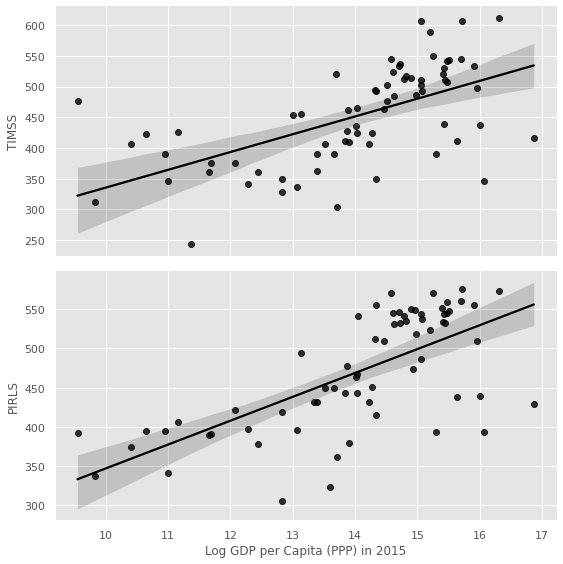

In [158]:
g = sns.PairGrid(merged, x_vars=['Log GDP2015'], y_vars=['TIMSS', 'PIRLS'], height=4, aspect=2)
g.map(sns.regplot, color='black')
g.set(xlabel='Log GDP per Capita (PPP) in 2015')

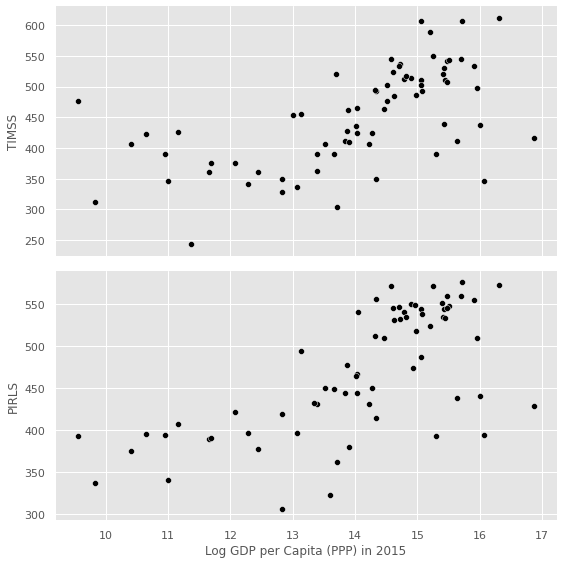

In [159]:
# Uncomment to separate the plots.
#sns.set(rc={'figure.figsize':(10,8)});
#f = sns.scatterplot(x= 'Log GDP2015', y= 'TIMSS', color='black', data=merged);
#f.set(xlabel=r'Log GDP per Capita (PPP) in 2015', ylabel= 'TIMSSS');
#sns.scatterplot(x= 'Log GDP2015', y= 'PIRLS', color='black', data=merged);

h = sns.PairGrid(merged, x_vars=['Log GDP2015'], y_vars=['TIMSS', 'PIRLS'], height=4, aspect=2)
h.map(sns.scatterplot, color='black')
h.set(xlabel='Log GDP per Capita (PPP) in 2015');

---
---

# E2

In [160]:
education = pd.read_stata('BL2013_MF1599_v2.2.dta')
education.head()

,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,WBcode,region_code
0,1.0,Algeria,1950.0,MF,15.0,999.0,80.684593,17.563400,3.745905,1.454129,0.459588,0.297876,0.164790,0.846457,0.744399,0.092804,0.009253,5241.0,DZA,Middle East and North Africa
1,1.0,Algeria,1955.0,MF,15.0,999.0,81.050957,17.018442,3.464397,1.639253,0.495228,0.259414,0.141776,0.835015,0.728405,0.098586,0.008024,5699.0,DZA,Middle East and North Africa
2,1.0,Algeria,1960.0,MF,15.0,999.0,82.611153,14.313748,3.069391,2.752519,1.049408,0.322578,0.173414,0.880083,0.706000,0.164163,0.009920,6073.0,DZA,Middle East and North Africa
3,1.0,Algeria,1965.0,MF,15.0,999.0,80.931877,14.420929,4.006678,4.209821,1.791863,0.426420,0.226569,1.096061,0.831003,0.251998,0.013060,6374.0,DZA,Middle East and North Africa
4,1.0,Algeria,1970.0,MF,15.0,999.0,73.636833,19.217760,5.225636,6.686831,3.256895,0.344648,0.179372,1.554976,1.155191,0.389305,0.010480,7100.0,DZA,Middle East and North Africa


Σύμφωνα με το άρθρο οι στήλες του dataset αντιστοιχούν σε:
- lu : no formal education
- lp : primary education
- lpc : complete primary
- ls : secondary
- lsc : upper secondary
- lh : tertiary
- lhc : hogher-level tertiary

In [161]:
ed2010 = education[education['year']==2010]
ed2010 = ed2010[['yr_sch', 'WBcode']]

In [162]:
ed2010.rename(columns={'WBcode': 'Country Code'}, inplace=True)
ed2010 = ed2010.set_index('Country Code')
ed2010 = ed2010.sort_index()

In [163]:
merged_all = merged.merge(ed2010, how='inner', left_index=True, right_index=True)
merged_all

,Country,TIMSS,PIRLS,GDP2015,Log GDP2015,yr_sch
Country Code,,,,,,
ARE,U.A.E.,437.000000,440.000000,65975.375547,16.009640,9.066772
ARG,Argentina,406.652557,431.443542,19101.297392,14.221383,9.510379
ARM,Armenia,454.000000,NaN,8195.933650,13.000693,10.726531
AUS,Australia,520.000000,534.000000,43719.502165,15.415989,11.541207
AUT,Austria,511.000000,533.000000,44353.875214,15.436773,9.603404
...,...,...,...,...,...,...
TUR,Turkey,477.000000,NaN,23388.481302,14.513511,7.050123
URY,Uruguay,424.912933,450.448608,19831.445894,14.275502,8.171520
USA,United States,544.000000,560.000000,53029.293361,15.694502,13.182642


In [164]:
model_years = smf.ols('yr_sch ~ np.log2(GDP2015)', data= merged_all)
res_years = model_years.fit()
res_years.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yr_sch   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     110.6
Date:                Sun, 01 May 2022   Prob (F-statistic):           4.74e-16
Time:                        17:35:14   Log-Likelihood:                -138.89
No. Observations:                  72   AIC:                             281.8
Df Residuals:                      70   BIC:                             286.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -10.1310      1.838     -5.512      0.000     -13.797      -6.465
np.log2(GDP2015)     1.3581      0.129     10.515      0.000       1.101       1.616
==============================================================================
Omnibus:                        8.402   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                7.855
Skew:                          -0.724   Prob(JB):                       0.0197
Kurtosis:                       3.723   Cond. No.                         132.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Για το μονελο **Years**

- Η σχέση της παλινδρόμησης είναι $$ schyears = 1.36 \log(GDP) - 10.13 $$
- Ενώ τη τιμή του συντελεστή $R^2$ που είναι $R^2=0.612$ ουσιαστικά μπορεί να εξηγήσει περίπου το $61\%$ της διακύμανσης των δεδομένων μας.

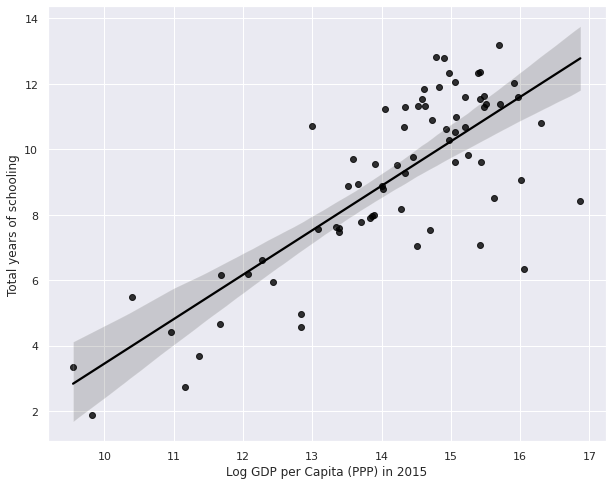

In [165]:
sns.set(rc={'figure.figsize':(10,8)});
h=sns.regplot(x= 'Log GDP2015', y= 'yr_sch', data=merged_all, color='black');
h.set_xlabel('Log GDP per Capita (PPP) in 2015');
h.set_ylabel('Total years of schooling');

In [166]:
residuals_PIRLS= res_PIRLS.resid
residuals_TIMSS = res_TIMSS.resid
residuals_years = res_years.resid

In [167]:
residuals_all = pd.concat([residuals_PIRLS, residuals_TIMSS, residuals_years], join='inner', axis=1)
residuals_all = residuals_all.rename(columns={0: 'Res_PIRLS', 1: 'Res_TIMSS', 2: 'Res_years'})

In [168]:
residuals_all.head()

,Res_PIRLS,Res_TIMSS,Res_years
Country Code,,,
ARE,-89.916813,-72.373659,-2.545659
ARG,-44.042720,-50.975909,0.326660
AUS,22.152588,27.804280,0.735040
AUT,20.519995,18.202895,-1.230990
BDI,59.144563,154.588308,0.510305


In [169]:
model_TIMSS_years = smf.ols('Res_TIMSS ~ Res_years', data= residuals_all)
results_TIMSS_years = model_TIMSS_years.fit()
results_TIMSS_years.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Res_TIMSS   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     23.53
Date:                Sun, 01 May 2022   Prob (F-statistic):           1.08e-05
Time:                        17:35:15   Log-Likelihood:                -300.61
No. Observations:                  56   AIC:                             605.2
Df Residuals:                      54   BIC:                             609.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0644      7.078     -0.009      0.993     -14.255      14.126
Res_years     21.4186      4.415      4.851      0.000      12.567      30.270
==============================================================================
Omnibus:                        5.419   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                4.523
Skew:                           0.523   Prob(JB):                        0.104
Kurtosis:                       3.918   Cond. No.                         1.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
model_PIRLS_years = smf.ols('Res_PIRLS ~ Res_years', data= residuals_all)
results_PIRLS_years = model_PIRLS_years.fit()
results_PIRLS_years.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Res_PIRLS   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     40.39
Date:                Sun, 01 May 2022   Prob (F-statistic):           4.57e-08
Time:                        17:35:15   Log-Likelihood:                -285.46
No. Observations:                  56   AIC:                             574.9
Df Residuals:                      54   BIC:                             579.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5292      5.400      0.654      0.516      -7.296      14.355
Res_years     21.4056      3.368      6.355      0.000      14.653      28.158
==============================================================================
Omnibus:                        1.419   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                0.693
Skew:                          -0.141   Prob(JB):                        0.707
Kurtosis:                       3.467   Cond. No.                         1.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

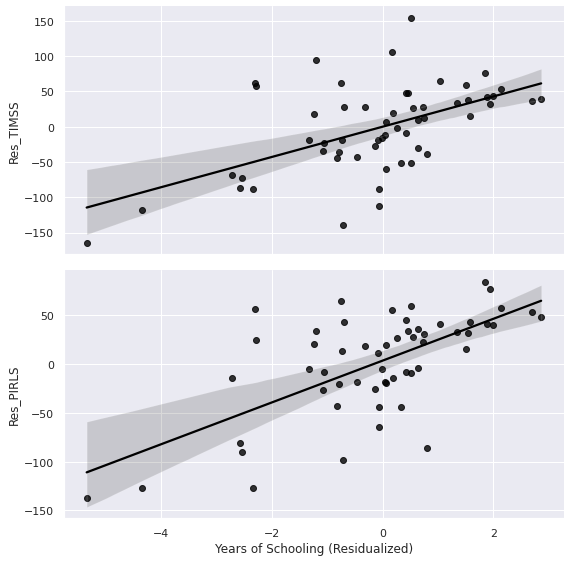

In [174]:
g = sns.PairGrid(residuals_all, x_vars=['Res_years'], y_vars=['Res_TIMSS', 'Res_PIRLS'], height=4, aspect=2)
g.map(sns.regplot, color='black')
g.set(xlabel='Years of Schooling (Residualized)');

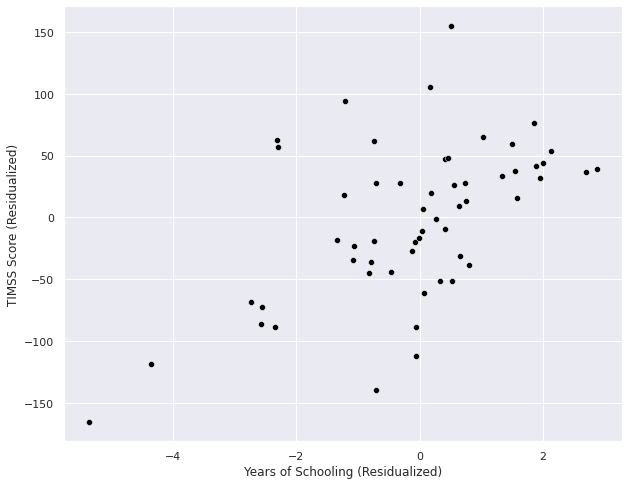

In [179]:
sns.set(rc={'figure.figsize':(10,8)});
k = sns.scatterplot(x= 'Res_years', y= 'Res_TIMSS', color='black', data=residuals_all);
k.set(xlabel='Years of Schooling (Residualized)', ylabel= 'TIMSS Score (Residualized)');

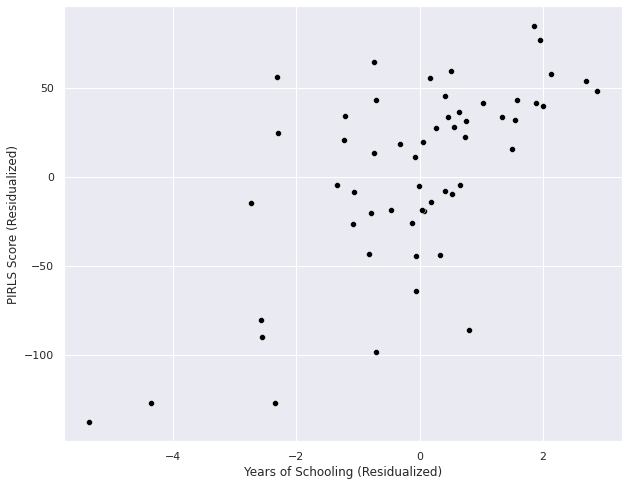

In [180]:
l = sns.scatterplot(x= 'Res_years', y= 'Res_PIRLS', color='black', data=residuals_all);
l.set(xlabel='Years of Schooling (Residualized)', ylabel= 'PIRLS Score (Residualized)');